In [92]:
import networkx as nx
import csv
import matplotlib.pyplot as plt

In [93]:
class Station:
    def __init__(self, name, type, district, city, line,traffic):
        self.name=name
        self.type=type
        self.district=district
        self.city=city
        self.line=line
        self.traffic=traffic

In [94]:
Stations = []
with open("Traffic in LaDefense.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        name = row['Name']
        type=row['Type']
        traffic=row['Traffic']
        district = row['District']
        city=row['City']
        line=row['Line'].split(', ')
        Stations.append(Station(name, type, district, city, line, traffic))

In [95]:
StationMap = nx.Graph()

In [96]:
StationMap2=nx.Graph()

In [97]:
StationMap3=nx.Graph()

In [146]:
StationSubset = Stations[0:100]

In [147]:
for s in StationSubset:
    StationMap.add_node(s, name = str(s.name))

In [148]:
color=[]
for s1 in StationSubset:
    for s2 in StationSubset:
        if not s1 == s2:
            for l in s1.line:
                if l in s2.line:
                    StationMap.add_edge(s1,s2)
                    color.append('orange')
            if s1.district==s2.district:
                StationMap2.add_edge(s1,s2)
                color.append('grey')
            
            

In [149]:
labels = nx.get_node_attributes(StationMap, 'name')

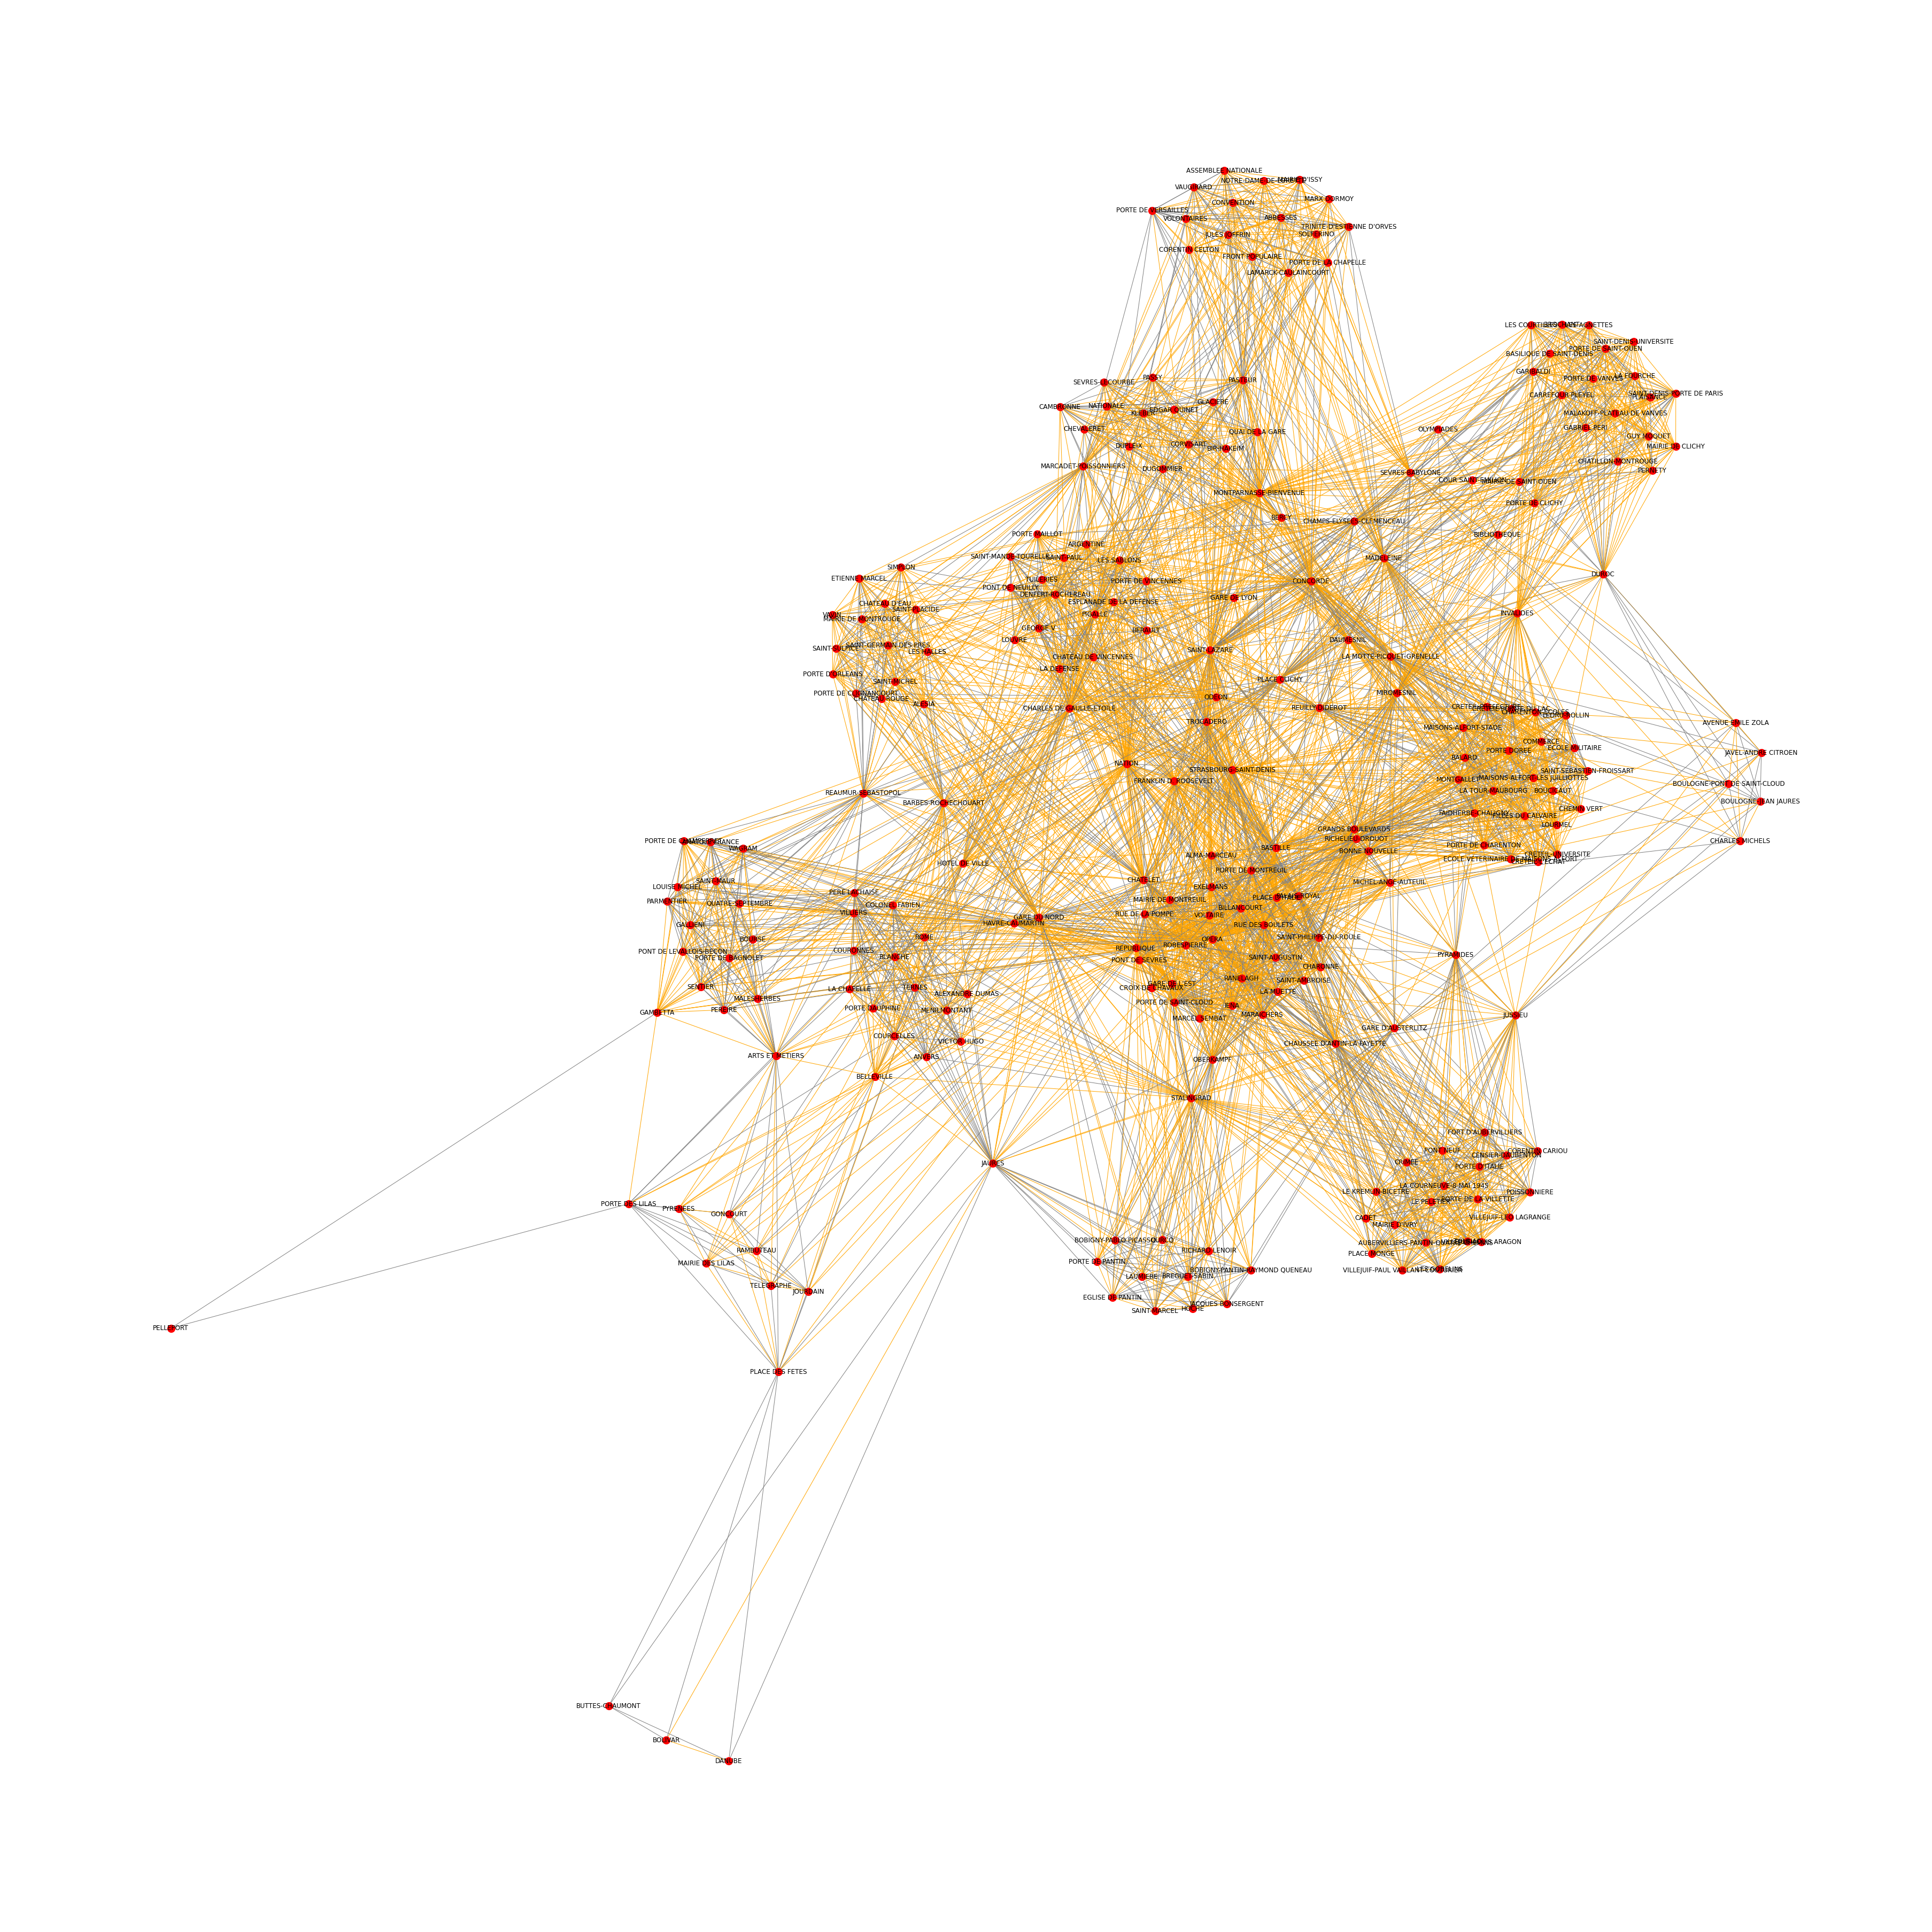

In [150]:
options = {'node_color':'red', 'node_size':200,'edge_color':color, 'width':1, 'labels':labels, 'with_labels': True}
plt.figure(1, figsize = (50, 50))
nx.draw(StationMap, **options)

The orange lines show the connections between the stations in Paris based the traffic lines going through them, and the gery lines show the stations that are in the same district